# Table of Contents

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Original Data\6.2_Homeless_Correlations.csv', index_col=False)

In [4]:
df

,Unnamed: 0,EncounterType,HospitalCounty,FacilityName,System,Ownership,Urban_Rural,Teaching,LicensedBedSize,PrimaryCareShortageArea,MentalHealthShortageArea,HomelessIndicator,Demographic,DemographicValue,Homeless_Pop,TotalEncounters,Percent,Non_Homeless_Population
0,0,Inpatient Hospitalizations,Alameda,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,0 to 18,0,288,0.0,288
1,1,Inpatient Hospitalizations,Alameda,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,19 to 39,42,288,14.6,246
2,2,Inpatient Hospitalizations,Alameda,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,40 to 59,147,288,51.0,141
3,3,Inpatient Hospitalizations,Alameda,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,60+,99,288,34.4,189
4,4,Inpatient Hospitalizations,Alameda,Alta Bates Summit Medical Center-Alta Bates Ca...,Sutter Health,Non-Profit,Urban,Non-Teaching,300-399,No,No,Homeless,Age,0 to 18,5,846,0.6,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12473,25293,Inpatient Hospitalizations,Sacramento,Vibra Hospital of Sacramento,Vibra Healthcare,Investor,Urban,Non-Teaching,01-99,No,No,Homeless,Payer,Medi-Cal,4,6,66.7,2
12474,25294,Inpatient Hospitalizations,Sacramento,Vibra Hospital of Sacramento,Vibra Healthcare,Investor,Urban,Non-Teaching,01-99,No,No,Homeless,Payer,Medicare,2,6,33.3,4
12475,25295,Inpatient Hospitalizations,Sacramento,Vibra Hospital of Sacramento,Vibra Healthcare,Investor,Urban,Non-Teaching,01-99,No,No,Homeless,Payer,Other Payer,0,6,0.0,6
12476,25296,Inpatient Hospitalizations,Sacramento,Vibra Hospital of Sacramento,Vibra Healthcare,Investor,Urban,Non-Teaching,01-99,No,No,Homeless,Payer,Private Coverage,0,6,0.0,6


In [19]:
df.shape

(12478, 18)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12478 entries, 0 to 12477
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12478 non-null  int64  
 1   EncounterType             12478 non-null  object 
 2   HospitalCounty            12478 non-null  object 
 3   FacilityName              12478 non-null  object 
 4   System                    8262 non-null   object 
 5   Ownership                 12478 non-null  object 
 6   Urban_Rural               12478 non-null  object 
 7   Teaching                  12478 non-null  object 
 8   LicensedBedSize           12478 non-null  object 
 9   PrimaryCareShortageArea   12478 non-null  object 
 10  MentalHealthShortageArea  12478 non-null  object 
 11  HomelessIndicator         12478 non-null  object 
 12  Demographic               12478 non-null  object 
 13  DemographicValue          12478 non-null  object 
 14  Homele

# Data Cleaning

In [21]:
# checking for duplicates
df_dups = df.drop_duplicates()

In [23]:
df_dups.shape # - No duplicates to remove

(12478, 18)

In [24]:
# checking for missing values
df.isnull().sum()  # - missing values for system is okay as not all hospitals are tied to a system. 

Unnamed: 0                     0
EncounterType                  0
HospitalCounty                 0
FacilityName                   0
System                      4216
Ownership                      0
Urban_Rural                    0
Teaching                       0
LicensedBedSize                0
PrimaryCareShortageArea        0
MentalHealthShortageArea       0
HomelessIndicator              0
Demographic                    0
DemographicValue               0
Homeless_Pop                   0
TotalEncounters                0
Percent                        0
Non_Homeless_Population        0
dtype: int64

## Create new dataframe for regression testing

In [61]:
# creating a new dataframe with only the columns we want for regression analysis
df2 = df[['HomelessIndicator', 'Demographic', 'DemographicValue', 'Homeless_Pop', 'TotalEncounters']]

In [62]:
df2

,HomelessIndicator,Demographic,DemographicValue,Homeless_Pop,TotalEncounters
0,Homeless,Age,0 to 18,0,288
1,Homeless,Age,19 to 39,42,288
2,Homeless,Age,40 to 59,147,288
3,Homeless,Age,60+,99,288
4,Homeless,Age,0 to 18,5,846
...,...,...,...,...,...
12473,Homeless,Payer,Medi-Cal,4,6
12474,Homeless,Payer,Medicare,2,6
12475,Homeless,Payer,Other Payer,0,6
12476,Homeless,Payer,Private Coverage,0,6


In [63]:
# filtering for only the Age Demographic and ages 40 - 59
df2 = df2[(df2.Demographic == "Age") & (df2.DemographicValue == "40 to 59")]

In [64]:
df2

,HomelessIndicator,Demographic,DemographicValue,Homeless_Pop,TotalEncounters
2,Homeless,Age,40 to 59,147,288
6,Homeless,Age,40 to 59,379,846
10,Homeless,Age,40 to 59,0,63
14,Homeless,Age,40 to 59,18,52
18,Homeless,Age,40 to 59,1818,4138
...,...,...,...,...,...
12395,Homeless,Age,40 to 59,1,6
12412,Homeless,Age,40 to 59,52,96
12429,Homeless,Age,40 to 59,2,4
12446,Homeless,Age,40 to 59,29,64


In [65]:
# creating a dataframe for the homeless population
homeless_pop = df2[df2.HomelessIndicator.isin(["Homeless"])]

In [66]:
# creating a dataframe for the non homeless encounters
non_homeless = df2[df2.HomelessIndicator.isin(["Non-Homeless"])]

In [68]:
homeless_pop.tail(20)

,HomelessIndicator,Demographic,DemographicValue,Homeless_Pop,TotalEncounters
12140,Homeless,Age,40 to 59,239,446
12157,Homeless,Age,40 to 59,879,1925
12174,Homeless,Age,40 to 59,68,117
12191,Homeless,Age,40 to 59,248,612
12208,Homeless,Age,40 to 59,37,88
12225,Homeless,Age,40 to 59,13,34
12242,Homeless,Age,40 to 59,33,83
12259,Homeless,Age,40 to 59,829,2502
12276,Homeless,Age,40 to 59,14,30
12293,Homeless,Age,40 to 59,7,35


In [73]:
df2

,HomelessIndicator,Demographic,DemographicValue,Homeless_Pop,TotalEncounters
2,Homeless,Age,40 to 59,147,288
6,Homeless,Age,40 to 59,379,846
10,Homeless,Age,40 to 59,0,63
14,Homeless,Age,40 to 59,18,52
18,Homeless,Age,40 to 59,1818,4138
...,...,...,...,...,...
12395,Homeless,Age,40 to 59,1,6
12412,Homeless,Age,40 to 59,52,96
12429,Homeless,Age,40 to 59,2,4
12446,Homeless,Age,40 to 59,29,64


In [77]:

print(df['HomelessIndicator'].unique())

['Homeless']


In [43]:
# creating a dataframe with only age as the demographic value. 
df3 = d`f2[df2.Demographic.isin(['Age'])]

In [44]:
df3.head()

,Demographic,DemographicValue,Homeless_Pop
0,Age,0 to 18,0
1,Age,19 to 39,42
2,Age,40 to 59,147
3,Age,60+,99
4,Age,0 to 18,5


### Viewing new dataframe 

In [45]:
df3.shape

(2936, 3)

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2936 entries, 0 to 12464
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Demographic       2936 non-null   object
 1   DemographicValue  2936 non-null   object
 2   Homeless_Pop      2936 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.8+ KB


In [47]:
# creating a new dataframes for dummy variable 
df4 = pd.get_dummies(df3, columns =['DemographicValue'])
df4

,Demographic,Homeless_Pop,DemographicValue_0 to 18,DemographicValue_19 to 39,DemographicValue_40 to 59,DemographicValue_60+
0,Age,0,1,0,0,0
1,Age,42,0,1,0,0
2,Age,147,0,0,1,0
3,Age,99,0,0,0,1
4,Age,5,1,0,0,0
...,...,...,...,...,...,...
12447,Age,21,0,0,0,1
12461,Age,0,1,0,0,0
12462,Age,1,0,1,0,0
12463,Age,2,0,0,1,0


In [48]:
df4.corr()

,Homeless_Pop,DemographicValue_0 to 18,DemographicValue_19 to 39,DemographicValue_40 to 59,DemographicValue_60+
Homeless_Pop,1.000000,-0.230698,0.112810,0.185718,-0.067829
DemographicValue_0 to 18,-0.230698,1.000000,-0.333333,-0.333333,-0.333333
DemographicValue_19 to 39,0.112810,-0.333333,1.000000,-0.333333,-0.333333
DemographicValue_40 to 59,0.185718,-0.333333,-0.333333,1.000000,-0.333333
DemographicValue_60+,-0.067829,-0.333333,-0.333333,-0.333333,1.000000


In [49]:
X = df4['DemographicValue_40 to 59']

In [50]:
X

0        0
1        0
2        1
3        0
4        0
        ..
12447    0
12461    0
12462    0
12463    1
12464    0
Name: DemographicValue_40 to 59, Length: 2936, dtype: uint8

In [51]:
y = df4['Homeless_Pop']

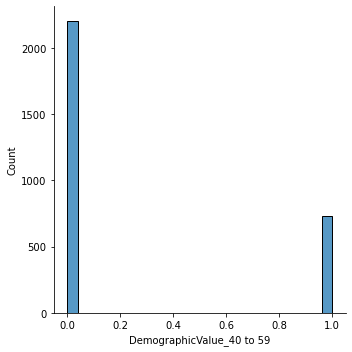

In [53]:
# checking for extreme values
sns.displot(df4['DemographicValue_40 to 59'], bins=25)

In [54]:
df4.value_counts()

Demographic  Homeless_Pop  DemographicValue_0 to 18  DemographicValue_19 to 39  DemographicValue_40 to 59  DemographicValue_60+
Age          0             1                         0                          0                          0                       196
             1             1                         0                          0                          0                        93
             2             1                         0                          0                          0                        53
             4             1                         0                          0                          0                        39
             5             1                         0                          0                          0                        39
                                                                                                                                  ... 
             306           0                         0        

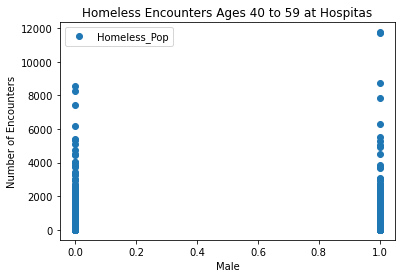

In [56]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df4.plot(x='DemographicValue_40 to 59', y='Homeless_Pop',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Homeless Encounters Ages 40 to 59 at Hospitas')  
plt.xlabel('Male')  
plt.ylabel('Number of Encounters')  
plt.show()